### Aluno : Yago David Pimenta
### RA : 800273

Para poder realizar todas as atividades tive que trocar meu dataframe . Agora irei falar sobre commodities.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving commodity_prices.csv to commodity_prices.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['commodity_prices.csv'].decode('utf-8')))

In [3]:
df

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Silver,Cotton,Rubber,Tobacco,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood
0,1960,0.59,0.92,1.03,1.63,NaN,0.14,0.14,0.07,0.13,...,0.91,0.65,0.78,1736.87,312.33,327.00,224.42,223.92,31.94,149.17
1,1961,0.48,0.90,0.95,1.57,NaN,0.15,0.13,0.06,0.13,...,0.92,0.67,0.60,1563.19,253.42,330.25,228.42,287.33,33.06,151.98
2,1962,0.46,0.83,0.97,1.52,NaN,0.16,0.13,0.06,0.11,...,1.08,0.65,0.56,1404.90,251.22,274.34,216.24,227.00,36.39,160.06
3,1963,0.55,0.81,0.95,1.50,NaN,0.16,0.14,0.18,0.09,...,1.28,0.65,0.52,1343.61,286.33,268.50,222.39,223.58,35.49,157.85
4,1964,0.51,1.01,0.93,1.45,NaN,0.15,0.17,0.13,0.08,...,1.29,0.65,0.49,1488.30,296.48,315.38,239.45,233.00,30.26,144.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,2.03,3.32,3.15,52.81,88.52,2.96,1.08,0.35,0.81,...,17.07,1.84,2.00,4627.36,1650.65,1460.79,750.81,850.40,265.43,702.11
58,2018,2.29,2.93,2.85,68.35,107.02,3.16,1.15,0.28,0.79,...,15.71,2.01,1.57,4865.96,996.77,1446.05,638.66,789.12,269.70,727.94
59,2019,2.34,2.88,2.56,61.41,77.89,2.57,1.14,0.28,0.56,...,16.22,1.72,1.64,4579.36,735.65,1407.37,601.37,765.44,273.10,695.89
60,2020,2.37,3.32,2.70,41.26,60.79,2.01,1.22,0.28,0.60,...,20.54,1.59,1.73,4336.28,1010.40,1697.81,751.77,837.76,278.94,699.71


#### a)Seleção de características

Nesse caso não precisamos fazer nenhum filtro ou wrapper , pois não estamos analisando as causas do preço estar esse .
Dito isso a seleção se dará a critério do autor , nesse contexto irei selecionar os 20 primeiros anos e vou querer o year , cocoa , caffe .



In [4]:
x = df.iloc[0:20,0:3]
print(x)

    Year  Cocoa  Coffee
0   1960   0.59    0.92
1   1961   0.48    0.90
2   1962   0.46    0.83
3   1963   0.55    0.81
4   1964   0.51    1.01
5   1965   0.37    1.00
6   1966   0.52    0.93
7   1967   0.60    0.86
8   1968   0.72    0.87
9   1969   0.90    0.88
10  1970   0.68    1.15
11  1971   0.54    0.99
12  1972   0.64    1.11
13  1973   1.13    1.37
14  1974   1.56    1.45
15  1975   1.25    1.44
16  1976   2.05    3.15
17  1977   3.79    5.17
18  1978   3.40    3.59
19  1979   3.29    3.83


#### b) amostragem (under-sampling e over-sampling)


In [5]:
simple_random_sample = x.sample(n=10,random_state=24)
simple_random_sample

,Year,Cocoa,Coffee
13,1973,1.13,1.37
6,1966,0.52,0.93
17,1977,3.79,5.17
5,1965,0.37,1.00
9,1969,0.90,0.88
8,1968,0.72,0.87
14,1974,1.56,1.45
16,1976,2.05,3.15
7,1967,0.60,0.86
10,1970,0.68,1.15


####c) preenchimento de dados faltantes e d) remoção deles

É possivel ver que está NaN para os primeiros 5 números do Coal , então vamos preencher ele .

In [6]:
coal = df[['Year', 'Coal']]
coal


,Year,Coal
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
57,2017,88.52
58,2018,107.02
59,2019,77.89
60,2020,60.79


Quero fazer um processo de pré processamento ,colocar os numeros faltantes como nan , utilizando como estratégia a média .

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np
from numpy import isnan
from numpy import nan

In [8]:
#preenchendo o nan com 0
coal.replace(np.nan, 0, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
coal

,Year,Coal
0,1960,0.00
1,1961,0.00
2,1962,0.00
3,1963,0.00
4,1964,0.00
...,...,...
57,2017,88.52
58,2018,107.02
59,2019,77.89
60,2020,60.79


In [10]:
#repreenchendo o 0 com nan
coal.replace( 0,np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
coal

,Year,Coal
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
57,2017,88.52
58,2018,107.02
59,2019,77.89
60,2020,60.79


In [12]:


imputer = SimpleImputer(missing_values=nan,strategy='mean')
transformed_values = imputer.fit_transform(coal)

print("%d"%isnan(transformed_values).sum())

0


In [13]:
transformed_values

array([[1960.        ,   48.50576923],
       [1961.        ,   48.50576923],
       [1962.        ,   48.50576923],
       [1963.        ,   48.50576923],
       [1964.        ,   48.50576923],
       [1965.        ,   48.50576923],
       [1966.        ,   48.50576923],
       [1967.        ,   48.50576923],
       [1968.        ,   48.50576923],
       [1969.        ,   48.50576923],
       [1970.        ,    7.8       ],
       [1971.        ,    8.68      ],
       [1972.        ,    9.6       ],
       [1973.        ,   11.48      ],
       [1974.        ,   16.89      ],
       [1975.        ,   26.84      ],
       [1976.        ,   27.16      ],
       [1977.        ,   28.68      ],
       [1978.        ,   29.06      ],
       [1979.        ,   30.89      ],
       [1980.        ,   40.14      ],
       [1981.        ,   53.62      ],
       [1982.        ,   54.77      ],
       [1983.        ,   38.19      ],
       [1984.        ,   30.96      ],
       [1985.        ,   

Agora vamos fazer um interpolate para ver quais seriam os valores

In [14]:
coal.interpolate()

,Year,Coal
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
57,2017,88.52
58,2018,107.02
59,2019,77.89
60,2020,60.79


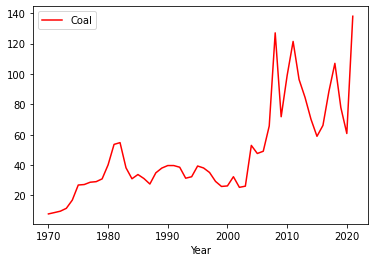

In [ ]:
coal.plot(kind='line',x=0,y=1,color='red')

#### e) suavização(binning)

Continuando o exemplo do coal vamos criar 3 bins e suavizar alguns de seus números .

In [23]:
#transformando em um numpy array seus valores
a = coal.iloc[10:,1:].values
print(type(a))

<class 'numpy.ndarray'>


In [52]:
bin1 = coal.iloc[10:40,1:].values



In [53]:
print(bin1)

[[ 7.8 ]
 [ 8.68]
 [ 9.6 ]
 [11.48]
 [16.89]
 [26.84]
 [27.16]
 [28.68]
 [29.06]
 [30.89]
 [40.14]
 [53.62]
 [54.77]
 [38.19]
 [30.96]
 [33.75]
 [31.13]
 [27.5 ]
 [34.88]
 [38.  ]
 [39.67]
 [39.67]
 [38.56]
 [31.33]
 [32.3 ]
 [39.37]
 [38.07]
 [35.1 ]
 [29.23]
 [25.89]]


In [55]:
bin1 = bin1.reshape(1,30)

In [56]:
print(bin1)

[[ 7.8   8.68  9.6  11.48 16.89 26.84 27.16 28.68 29.06 30.89 40.14 53.62
  54.77 38.19 30.96 33.75 31.13 27.5  34.88 38.   39.67 39.67 38.56 31.33
  32.3  39.37 38.07 35.1  29.23 25.89]]


In [64]:
for i in range (0,30,5):
    k=int(i/5)
    mean=(bin1[0,i] + bin1[0,i+1] + bin1[0,i+2] + bin1[0,i+3] + bin1[0,i+4])/5
    for j in range(5):
        bin1[0,j]=mean
        print("Bin Mean: \n",bin1[0,j])


Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 28.526
Bin Mean: 
 28.526
Bin Mean: 
 28.526
Bin Mean: 
 28.526
Bin Mean: 
 28.526
Bin Mean: 
 43.536
Bin Mean: 
 43.536
Bin Mean: 
 43.536
Bin Mean: 
 43.536
Bin Mean: 
 43.536
Bin Mean: 
 33.052
Bin Mean: 
 33.052
Bin Mean: 
 33.052
Bin Mean: 
 33.052
Bin Mean: 
 33.052
Bin Mean: 
 36.306000000000004
Bin Mean: 
 36.306000000000004
Bin Mean: 
 36.306000000000004
Bin Mean: 
 36.306000000000004
Bin Mean: 
 36.306000000000004
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532
Bin Mean: 
 33.532


#### f) discretização

In [73]:
#se for maior que 30 vai por 1 se nao vai por 0
np.digitize(bin1,bins=[30])

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0]])

##### g) quantização

In [82]:
 q = pd.qcut(df['Coffee'], 5)
 q

0     (0.809, 1.192]
1     (0.809, 1.192]
2     (0.809, 1.192]
3     (0.809, 1.192]
4     (0.809, 1.192]
           ...      
57     (3.01, 3.442]
58     (2.098, 3.01]
59     (2.098, 3.01]
60     (3.01, 3.442]
61     (3.442, 5.98]
Name: Coffee, Length: 62, dtype: category
Categories (5, interval[float64, right]): [(0.809, 1.192] < (1.192, 2.098] < (2.098, 3.01] <
                                           (3.01, 3.442] < (3.442, 5.98]]

#### h) normalização

In [89]:
display(df[['Coffee']])

,Coffee
0,0.92
1,0.90
2,0.83
3,0.81
4,1.01
...,...
57,3.32
58,2.93
59,2.88
60,3.32


In [87]:
#Using The maximum absolute scaling:

# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques on Column 1
column = 'Coffee'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
  
# view normalized data
display(df_max_scaled[['Coffee']])

,Coffee
0,0.153846
1,0.150502
2,0.138796
3,0.135452
4,0.168896
...,...
57,0.555184
58,0.489967
59,0.481605
60,0.555184


#### g) mapeamento de dominio
Não da para fazer pois meu dataframe não contempla

## Conclusão:
Infelizmente os dados dos dataframes não da para usar todas as técnicas as quais aprendemos , portanto , existe algumas adaptações e criações de outros dataframes durante a execução desse colab .

 Espero que tenham gostado :) 